<a href="https://colab.research.google.com/github/Jagadeeshkumaryanda/Machine_learning_models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import copy
import math

In [30]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Student_Performance.csv')
data.shape

(10000, 6)

In [31]:
df = copy.deepcopy(data)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [32]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [33]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1,'No':0})

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


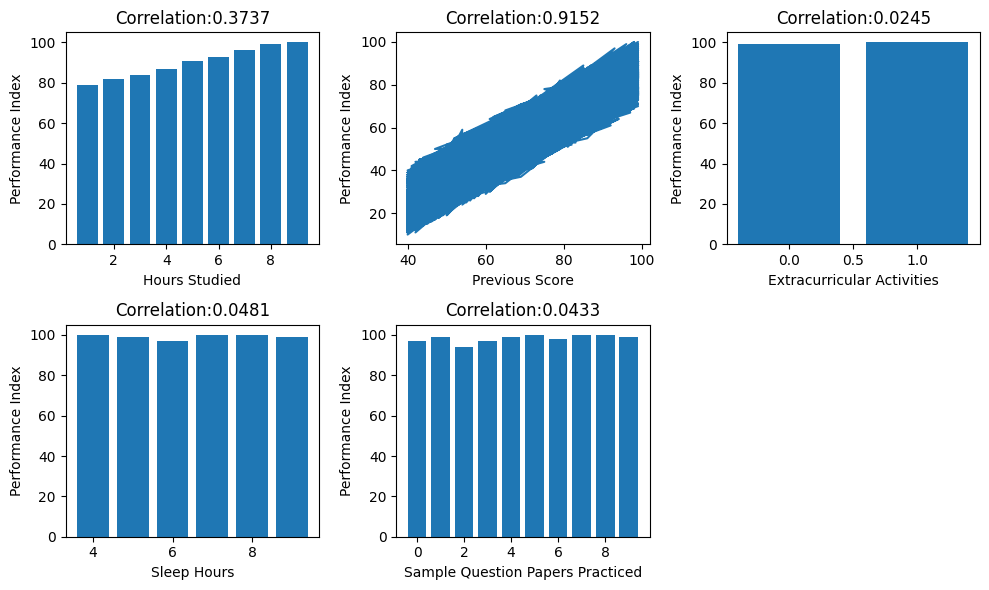

In [34]:
plt.figure(figsize = (10,6))

plt.subplot(2, 3, 1)
plt.bar(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Correlation:{}'.format(round(df['Hours Studied'].corr(df['Performance Index']), 4)))

plt.subplot(2, 3, 2)
plt.plot(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Correlation:{}'.format(round(df['Previous Scores'].corr(df['Performance Index']), 4)))

plt.subplot(2, 3, 3)
plt.bar(df['Extracurricular Activities'], df['Performance Index'])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Correlation:{}'.format(round(df['Extracurricular Activities'].corr(df['Performance Index']), 4)))

plt.subplot(2, 3, 4)
plt.bar(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Correlation:{}'.format(round(df['Sleep Hours'].corr(df['Performance Index']), 4)))

plt.subplot(2, 3, 5)
plt.bar(df['Sample Question Papers Practiced'], df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Correlation:{}'.format(round(df['Sample Question Papers Practiced'].corr(df['Performance Index']), 4)))

plt.tight_layout()
plt.show()

In [40]:
x = df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y = df['Performance Index']

x_np = x.values
y_np = y.values

indices = np.arange(len(x_np))
np.random.shuffle(indices)

split_idx = int(0.8*len(x_np))

x_train, x_test = x_np[indices[:split_idx]], x_np[indices[split_idx:]]
y_train, y_test = y_np[indices[:split_idx]], y_np[indices[split_idx:]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8000, 5) (8000,)
(2000, 5) (2000,)


array([ 3, 44,  0,  8,  8])

In [42]:
# function for stright line

def compute_cost(w,b,x,y):

  cost = 0
  m = x_train.shape[0]
  for i in range(m):
      f_wb_i = np.dot(x_train[i], w) + b
      cost = cost + (f_wb_i - y_train[i])**2
      final_cost = cost/(2*m)

  return final_cost


In [56]:
def compute_gradient(w,b,x,y):

  m,n = x_train.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(x_train[i], w) + b) - y_train[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x_train[i,j]
    dj_db = dj_db + err

  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_db, dj_dw


In [47]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iter):

  J_history = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(num_iter):

    dj_db, dj_dw = gradient_function(w,b,x,y)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i<100000:
      J_history.append(cost_function(w,b,x,y))

    if i % math.ceil(num_iter/10) == 0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

  return w,b,J_history

In [92]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.

iterations = 1000
alpha = 5.0e-5

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost   951.39   
Iteration  100: Cost    35.47   
Iteration  200: Cost    34.44   
Iteration  300: Cost    33.47   
Iteration  400: Cost    32.56   
Iteration  500: Cost    31.71   
Iteration  600: Cost    30.91   
Iteration  700: Cost    30.15   
Iteration  800: Cost    29.44   
Iteration  900: Cost    28.78   
b,w found by gradient descent: -0.04,[ 0.6373516   0.78515471 -0.01097156 -0.17188959 -0.07458547] 


In [82]:
for i in range(5):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 34.45, target value: 24.0
prediction: 47.94, target value: 45.0
prediction: 59.77, target value: 53.0
prediction: 31.92, target value: 23.0
prediction: 38.47, target value: 32.0


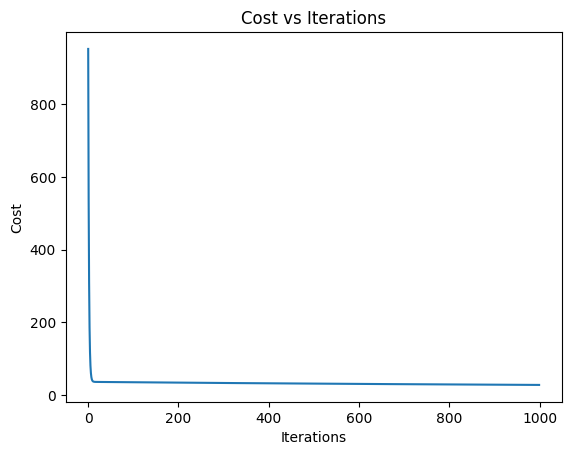

In [83]:
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

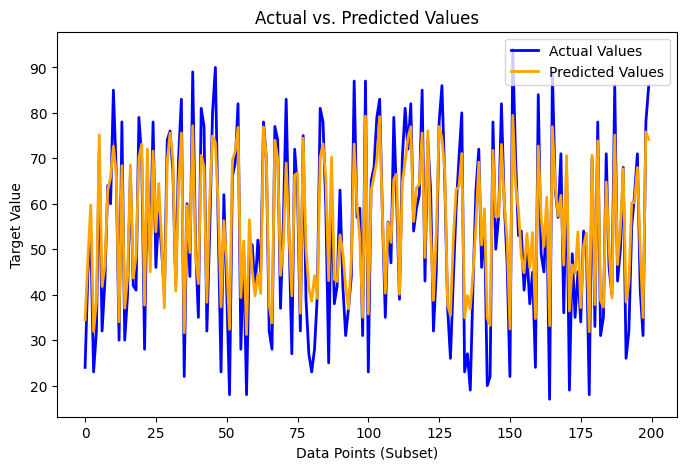

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Compute predicted values
y_pred = np.dot(x_train, w_final) + b_final

# Select a subset of data for better visibility (e.g., first 200 points)
num_samples = 200  # Adjust as needed
x_axis = np.arange(num_samples)  # X-axis for first `num_samples` data points

plt.figure(figsize=(8, 5))  # Set figure size

# Plot first `num_samples` values for clarity
plt.plot(x_axis, y_train[:num_samples], label="Actual Values", color="blue", linestyle="-", linewidth=2)
plt.plot(x_axis, y_pred[:num_samples], label="Predicted Values", color="orange", linestyle="-", linewidth=2)

# Labels and title
plt.xlabel("Data Points (Subset)")
plt.ylabel("Target Value")
plt.title("Actual vs. Predicted Values")
plt.legend()

plt.show()


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 6.12
Mean Squared Error (MSE): 56.31
Root Mean Squared Error (RMSE): 7.50
R² Score: 0.8488


In [95]:
y_pred = np.dot(x_test, w_final) + b_final

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 6.03
Mean Squared Error (MSE): 54.88
Root Mean Squared Error (RMSE): 7.41
R² Score: 0.8458
